In [197]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# REVISIONS DE BASE

### Modules et bibliotheques

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd
from math import sqrt
import copy
import math

### Itérables et interruptions de boucles

In [40]:
mot='Bonjour'
for elt in mot:
    print(elt)#parenthèses obligatoires

B
o
n
j
o
u
r


In [41]:
mot='Bonjour'
for elt in mot:
    if elt=='j':
        break
    print(elt)

B
o
n


In [35]:
mot='Bonjour'
for elt in mot:
    if elt=='j':
        continue
    print(elt)

B
o
n
o
u
r


In [39]:
uplet=(1,9,12,6)
for elt in uplet:
    print(elt)

1
9
12
6


In [42]:
uplet[1]=3,mot[1]=a#immutables

SyntaxError: cannot assign to literal (<ipython-input-42-b1212236e974>, line 1)

### Recherche d'un élément dans une liste

Test de présence

In [44]:
def rech(L,x):
    for elt in L:
        if elt==x:
            return True#retour prématuré
    return False
L=[2,7,8,2,9,3]
rech(L,2),rech(L,4)

(True, False)

Test et retour du premier indice

In [46]:
def rech_bis(L,x):
    for i in range(len(L)):
        if L[i]==x:
            return i
    return float('inf')
rech_bis(L,2),rech_bis(L,4)

(0, inf)

In [48]:
def rech_ter(L,x):
    ind=0
    for elt in L:
        if elt==x:
            return True,ind
        ind+=1
    return False,float('inf')#homogénéité des valeurs renvoyées
rech(L,2),rech(L,4)

((True, 0), (False, inf))

Retour de tous les indices

In [50]:
def rech_exhaust(L,x):
    M=[]
    for i in range(len(L)):#semi-ouvert à droite
        if L[i]==x:
            M.append(i)
    return M
LL=[2,3,4,2,2,7,2]
rech_exhaust(LL,2)

[0, 3, 4, 6]

### Types et mutabilité
* Types immutables (ou non muables) :
  * int
  * float
  * bool
  * str
  * tuple
  * (file)
* Types mutables (ou muables) :
  * list
  * dict
  * set

Type mutable : 
* modifications possible en place
* copie par référence (étiquettes)

In [76]:
L=[1,2,3]#délimiteurs '[]' et séparateurs ','
M=L#Copie par référence
M[2]=8
M,L

([1, 2, 8], [1, 2, 8])

In [56]:
id(M),id(L)#Même objet - Etiquettes différentes

(140380352648064, 140380352648064)

In [77]:
ch1='lapin'
ch2=ch1#Reassignation
ch1='aigle'
ch1,ch2

('aigle', 'lapin')

### Autres propriétés des listes

Concaténation

In [62]:
[1,2]+[2,8]#nouvel objet

[1, 2, 2, 8]

Longueur

In [95]:
L=[1,2,3]
len(L)

3

Véritable copie

In [96]:
L=[1,3,5]#Réaffectation
M=L+[]
M,L,id(L),id(M)

([1, 3, 5], [1, 3, 5], 140380084287616, 140378997192640)

Ajout d'un élément

In [100]:
LL=[1,3]
LL.append(8)#empilement d'un élément
LL

[1, 3, 8]

In [101]:
LL=[4]+LL#empilement à gauche : enfilage

In [102]:
LL

[4, 1, 3, 8]

Réciproque : suppression du dernier élément

In [103]:
LL.pop()
#LL.pop(2) : H.P.

8

In [104]:
LL

[4, 1, 3]

Concaténation de copies

In [67]:
[1,2]*4

[1, 2, 1, 2, 1, 2, 1, 2]

Définition de liste par extension

In [68]:
num1=[i**2 for i in range(1,13)]
num2=[i**2 for i in range(1,13) if i%2==1]
num1,num2

([1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144], [1, 9, 25, 49, 81, 121])

Le piège de la copie de mutables

In [2]:
Mat=[[0]*12]*12#copie de liste
Mat2=[[0]*12 for i in range(12)]#copie d'integers

In [3]:
Mat,Mat2

([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
Mat[0][0]=1
Mat2[0][0]=1

In [5]:
Mat,Mat2

([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

$\hookrightarrow$ Effet de bord

In [6]:
Mat3=copy.deepcopy(Mat2)

Slicing

In [105]:
L=[1,7,3,9,8,6]
len(L)

6

In [106]:
L[2:4]#slicing semi-ouvert à droite

[3, 9]

### Dictionnaires

Définition : 
* clés - valeurs
* délimiteurs et séparateurs

In [26]:
eurovision={'France':0,'Italie':5,'Allemagne':2}
eurovision['France'],len(eurovision)

(0, 3)

Mutabilité : 
* changement de valeurs (éventuellement mutables)
* ajout d'associations clé-valeur

In [27]:
eurovision['Italie']=45
eurovision['Italie']

45

In [28]:
eurovision['Pologne']=12

In [111]:
for cle in eurovision:
    eurovision[cle]+=rd.randint(0,5)

In [112]:
eurovision.keys(),eurovision.values(),eurovision.items()#récupération des éléments

(dict_keys(['France', 'Italie', 'Allemagne', 'Pologne']),
 dict_values([1, 47, 2, 13]),
 dict_items([('France', 1), ('Italie', 47), ('Allemagne', 2), ('Pologne', 13)]))

Itération sur les clés :   
for cle in _ $\approx$ for elt in _.keys()

<b>Attention :</b> éléments non ordonnés si Python < 3.6   
$\rightarrow$ >3.7 : ordre d'insertion   
$\rightarrow$ Plus sûr pour conserver les associations : unpacking d'items

In [32]:
Lk,Lv=[],[]
for elt in eurovision.items():
    a,b=elt
    Lk.append(a)
    Lv.append(b)
Lk,Lv

(['France', 'Italie', 'Allemagne', 'Pologne'], [0, 45, 2, 12])

Remarque : Clés non hashables (ex : mutables)

In [29]:
dicotest={[1,2]:1,[1,3]:2}

TypeError: unhashable type: 'list'

Test 

In [30]:
'France' in eurovision,'Espagne' in eurovision

(True, False)

### Dictionnaires et histogrammes

Diagrammes en bâtons

<BarContainer object of 4 artists>

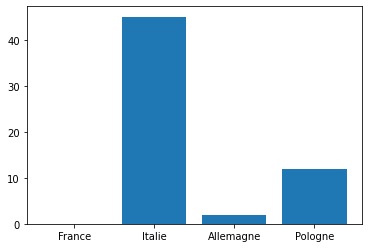

In [34]:
plt.bar(eurovision.keys(),eurovision.values())

<BarContainer object of 4 artists>

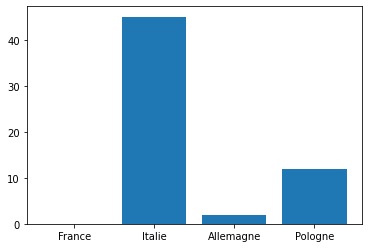

In [33]:
plt.bar(Lk,Lv)

Histogrammes

In [35]:
L=[rd.randint(101) for i in range(1000)]#liste aléatoire
L.count(0),L.count(2)

(13, 6)

(array([ 96., 107.,  96.,  89., 100.,  89., 107., 100., 111., 105.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

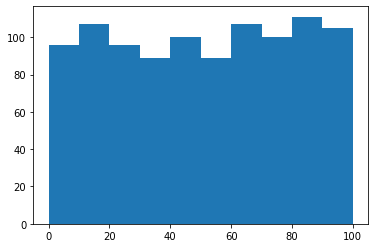

In [36]:
plt.hist(L)

$\rightarrow$ problème de la taille des classes

(array([13., 10.,  6.,  9.,  5., 10., 10., 13., 13.,  7.,  3.,  7., 11.,
        12., 10., 14., 12.,  8., 12., 18.,  8.,  8.,  8.,  8., 20.,  6.,
         5., 11., 14.,  8.,  6., 11.,  9.,  9., 18.,  8., 10.,  5.,  5.,
         8.,  8., 16., 12.,  6., 15., 10.,  6.,  7., 10., 10.,  6.,  7.,
         6., 10., 11., 13.,  9.,  8.,  7., 12.,  7.,  7., 19., 18.,  6.,
        10.,  8., 10., 11., 11.,  9., 11.,  8., 12., 12., 12.,  9., 10.,
        13.,  4., 10., 10., 12., 12., 10., 12., 14., 15.,  5., 11., 10.,
        13.,  8., 10.,  7.,  4., 11., 15.,  7.,  6., 14.]),
 array([  0.        ,   0.99009901,   1.98019802,   2.97029703,
          3.96039604,   4.95049505,   5.94059406,   6.93069307,
          7.92079208,   8.91089109,   9.9009901 ,  10.89108911,
         11.88118812,  12.87128713,  13.86138614,  14.85148515,
         15.84158416,  16.83168317,  17.82178218,  18.81188119,
         19.8019802 ,  20.79207921,  21.78217822,  22.77227723,
         23.76237624,  24.75247525,  25.74257

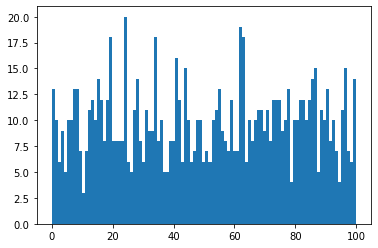

In [37]:
plt.hist(L,bins=101)

In [38]:
M=[rd.randint(1001) for i in range(101)]#liste creuse

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 

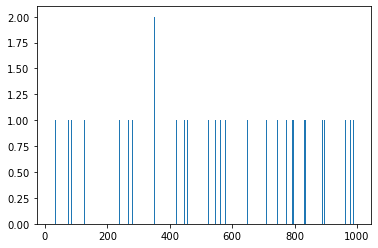

In [39]:
plt.hist(M,bins=1000)

$\rightarrow$ Beaucoup de 0 

In [40]:
compte={}
for elt in M:
    compte[elt]=compte.get(elt,0)+1#Subtil : ajout même si clé inexistante
#compte.values(),compte.keys()
len(compte)

97

<BarContainer object of 97 artists>

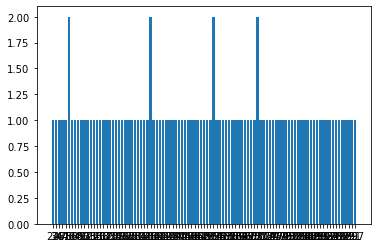

In [41]:
Artistes,Valeurs=[],[]
for i in range(1001):
    if i in compte:
        Artistes.append(str(i))#Expliquer sans le 'str'
        Valeurs.append(compte[i])
plt.bar(Artistes,Valeurs)

### Fichiers

Ouverture et écriture

In [44]:
fich=open('texte.txt','w')#Création par défaut

In [45]:
fich.write('lapin')
fich.write('chien\nchat')

10

Lecture

In [46]:
fich.close()
fichbis=open('texte.txt','r')
fichbis.readline(),fichbis.readline()#lecture ligne à ligne

('lapinchien\n', 'chat')

In [146]:
fich.close()
fichbis=open('texte.txt')
fichbis.readlines()#liste des lignes

['lapinchien\n', 'chat']

In [47]:
fich.close()
fichbis=open('texte.txt')
fichbis.read()#lecture de tout le fichier

'lapinchien\nchat'

Modes d'ouverture

In [48]:
fichbis.close()
fich=open('texte.txt','w')#mode write only
fich.write('renard')
fich.close()
fich=open('texte.txt')
fich.readlines()

['renard']

$\rightarrow$ Ecrasement en écriture ('w')

In [49]:
fich.close()
fich=open('texte.txt','a')#mode append only
fich.write('coati')
fich.close()
fich=open('texte.txt')
fich.readlines()

['renardcoati']

$\rightarrow$ Ecriture à la fin ('a')

In [159]:
fich.close()
fich=open('texte.txt','a')
fich.writelines(['rat','\nraton'])
fich.close()
fich=open('texte.txt')
fich.readlines()

['renardcoatirat\n', 'raton']

In [160]:
fich.close()
fich=open('texte.txt','r+')#Ecriture autorisée suivant la position du curseur
fich.readline()
fich.write('lapin')

5

In [161]:
fich.close()
fich=open('texte.txt')
fich.readlines()

['renardcoatirat\n', 'ratonlapin']

Autres commandes de lecture

In [50]:
fich.close()
fich=open('texte.txt')
fich.read(1),fich.read(1),fich.tell()

('r', 'e', 2)

### Fonctions

In [57]:
def f(x):#Fonction
    return x*2

In [58]:
f(1),f(math.pi),f([1,2,3])

(2, 6.283185307179586, [1, 2, 3, 1, 2, 3])

In [ ]:
def crée():#Fonctions sans argument
    return []

In [ ]:
def ajoute(L):#procédure
    L.append(1)

In [ ]:
def dépile(L):#Routine
    return L.pop()

In [168]:
L=[1,2,3,4]
M=map(lambda x:x**2,L)#Fonction locale
list(M)

[1, 4, 9, 16]

Fonction locale dans une fonction :   
$\rightarrow$ voir recherche dichotomique

# QUELQUES PROGRAMMES ET ALGORITHMES

Maximum d'une liste : parcours linéaire

In [171]:
import typing

In [173]:
def rechmax(L:list)->int:
    assert (len(L)>0),'liste vide'
    maxi=L[0]
    n=len(L)
    for i in range(1,n):
        if L[i]>maxi:
            maxi=L[i]
    return maxi

In [174]:
L=[6,1,9,7,10,6]
rechmax(L)

10

Second maximum : conditions imbriquées

In [175]:
def rechmax2(L:list)->int:
    assert (len(L)>1),'liste trop petite'
    a,b=L[0],L[1]
    if L[0]>L[1]:
        maxi1,maxi2=L[0],L[1]
    else:
        maxi1,maxi2=L[1],L[0]
    n=len(L)
    for i in range(2,n):
        if L[i]>maxi2:
            if L[i]>maxi1:
                maxi1,maxi2=L[i],maxi1
            else:
                maxi2=L[i]
    return maxi2

In [176]:
rechmax2(L)

9

Premier facteur dans un texte : boucles imbriquées

In [183]:
def rech(mot,texte):
    n,m=len(texte),len(mot)
    for i in range(len(texte)):
        ind=0
        while ind<m and ind+i<n and texte[i+ind]==mot[ind]:
            ind+=1
        if ind==m:
            return True,i
    return False,float('inf')

In [186]:
mot='bla'
texte='lablall'
texte2='lllbla'
rech(mot,texte),rech(mot,texte2)

((True, 2), (True, 3))

Il y a plus simple et lisible à l'aide de slicing

In [193]:
def rech_bis(mot,texte):
    n,m=len(texte),len(mot)
    if n<m:
        return False,float('inf')
    else:
        for i in range(n-m+1):#Attention à bien ajuster les indices
            if texte[i:i+m]==mot:
                return True, i
    return False,float('inf')

In [194]:
rech_bis(mot,texte),rech_bis(mot,texte2)

((True, 2), (True, 3))

### Recherche dichotomique (liste)
* Recherche de l'appartenance de $x$ à $L$    
$\rightarrow$ Par découpages successifs.
* Liste triée :
    * Tant que la liste n'est pas vide
    * On regarde au milieu
    * Non trouvé     
        $\rightarrow$ Recherche à droite/gauche (strict)

* On maintient à chaque étape les indices de <i>gauche et droit</i> du sous-tableau où se fait la recherche    
    * Intitialisation $g=0$, $d=\verb"len(L)"-1$    
    * Test au milieu $m=(g+d)//2$    
    $\rightarrow$ $\verb"L[m]=x"$ $\Rightarrow$ $x$ est trouvé $\Rightarrow$ sortie de boucle    
    $\rightarrow$ $\verb"L[m]<x"$ $\Rightarrow$ $x$ est à droite $\Rightarrow$ $g\leftarrow m+1$, $d\leftarrow d$    
    $\rightarrow$ $\verb"L[m]>x"$ $\Rightarrow$ $x$ est à gauche $\Rightarrow$ $g\leftarrow g$, $d\leftarrow m-1$
    * Cas de base : $L$ contient 0 ou 1 élément  
    * Sortie définitive de boucle : $d-g<0$

In [195]:
def dichotomie_liste(L,x):
    """L triée dans l'ordre croissant, on cherche si x est dans L 
    en renvoyant le booléen correspondant."""
    g=0
    d=len(L)-1
    while g<=d:
        m=(d+g)//2
        if L[m]==x:
            return True
        elif L[m]<x:
            g=m+1 
        else:
            d=m-1
    return False

#### Terminaison
* Variant de boucle : la suite $(f-d)$ décroît strictement avec les itérations

#### Correction
* Si x est présent dans le tableau on a l'invariant :
$$L[d]\leq x\leq L[f]$$
* Si x n'y est pas l'invariant est (par exemple) $x\not\in L$ !

#### Complexité (pire des cas)

* $C(n)=C(\frac{n}{2})+4$
* $C(n)=O(\ln n)$   
$\rightarrow$ Preuve accessible avec $n=2^k$, $u_k=\frac{C(2^k)}{2^k}$ et téléscopage

#### Recherche dichotomique récursive
A chaque appel récursif :
* <b> Diviser :</b> On découpe une liste $\verb"[L[0],...,L[n-1]]"$ en deux sous listes $\verb"[L[0],...,L["\lfloor \frac{n}{2} \rfloor\verb"]]"$ et $\verb"[L["\lfloor \frac{n}{2} \rfloor+1\verb"...L[n-1]]"$
* <b> Régner :</b> On cherche récursivement $\verb"x"$ dans ces deux sous-instances    
$\rightarrow$ Cas de base liste de taille 0 (absence de $x$) ou 1 (simple test)
* <b> Combiner :</b> On conclut que $\verb"x"$ est trouvé s'il l'est dans l'une des sous-instances.

In [ ]:
def rech_dicho(x,L):
    if len(L)==0:
        return False
    else:
        m=len(L)//2
        if L[m]==x:
            return True
        elif L[m]>x:
            return rech_dicho(x,L[:m])
        else:
            return rech_dicho(x,L[m+1:])


rech_dicho(4,[1,1,2,3,4,5,6]),rech_dicho(8,[1,1,2,3,4,5,6])

In [ ]:
def rech_dicho_indice(x,L):
    if len(L)==0:
        return NaN
    else:
        m=len(L)//2
        if L[m]==x:
            return m
        elif L[m]>x:
            return rech_dicho_indice(x,L[:m])
        else:
            return m+1+rech_dicho_indice(x,L[m+1:])

rech_dicho_indice(4,[1,1,2,3,4,5,6])

En place :

In [24]:
def rech_dicho_rec_place(x,L):
    def recherche(x,L,g,d):
        if d-g<=0:
            return False
        elif d-g==1:
            return x==L[g]
        else:
            m=(d+g)//2
            if L[m]==x:
                return True
            elif x<L[m]:
                return recherche(x,L,g,m)
            else:
                return recherche(x,L,m+1,d)
    return recherche(x,L,0,len(L))

rech_dicho_rec_place(3,[1,1,2,2,4,5,6])

False

### Recherche dichotomique (fonctions)
* Fonction continue $f$ sur $[a,b]$ telle que $f(a)f(b)<0$ (TVI):
    * Tant que l'intervalle $[c,d]$ est de longueur > $\epsilon$
    * On regarde au milieu $m=\frac{c+d}{2}$ le signe de $f(m)$
    * $f(m)\neq 0$        
        $\rightarrow$ Recherche $[c,m]$/$[m,d]$

In [196]:
def zero(f,a,b,eps):
    """ f une fonction telle que f(a)*f(b)<=0, alors on renvoie un zero de f a epsilon pres. """
    assert f(a)*f(b)<=0, "attention, f(a)f(b)>0"
    c,d=a,b
    while d-c>2*eps:
        #Invariant: f(a)f(b)<=0
        #Variant : b-a
        m=(c+d)/2.
        val=f(m)
        if val<=10e-10:#erreurs arrondis
            return m
        elif val*f(c)<=0:
            d=m 
        else:
            c=m
    return (c+d)/2

### Tri bulle

* Variation (rappelant les bulles de champagne) autour du tri par sélection
* Tri en place par parcours de liste
* <b>Principe :</b>
    * On <i>fait remonter</i> en fin de liste le plus grand élément de la liste par échanges successif
    * On applique successivement ce principe au tableau qu'on parcourt entièrement, sauf le dernier (les 2 derniers, les 3 derniers,...) élément(s) qui est(/sont) en place.

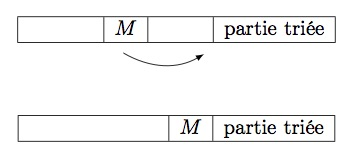

In [5]:
from IPython.display import Image,display
i = Image(filename='figtribulle.jpg')
display(i)

In [6]:
import random
import sys
import matplotlib.animation as anim

def initie(n,r):  #fait ce qu'il faut 
    global fig, ax, scat
    lx=range(n)
    lval = [random.randrange(1,r) for i in range(n)]      
    fig, ax=plt.subplots(1,1)
    scat=ax.scatter(lx,lval)
    return [(i,j) for i in range(n) for j in range(n-i-1)]



def change(u,fig,scat):   #fait aussi ce qu'il faut
    i,j=u#unpacking
    LL=scat.get_offsets()
    if LL[j][1]>LL[j+1][1]:
        LL[j][1],LL[j+1][1]=LL[j+1][1],LL[j][1]
    scat.set_offsets(LL)

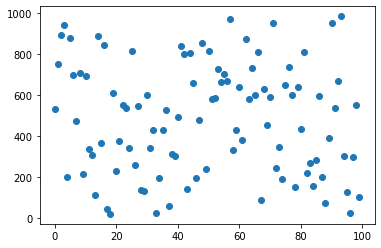

In [9]:
n=100
r=1000
plt.close
lframes=initie(n,r)
ani=anim.FuncAnimation(fig,change,fargs=(fig,scat),frames=lframes,interval=10)

In [10]:
from IPython.display import HTML
HTML(ani.to_html5_video())

* Tribulle :
    * Boucle sur $i\in [| 0,n-1|]$
    * Parcours sous liste $\verb"L[:n-i]" $   
        $\rightarrow$ si $\verb"L[j]" >\verb"L[j+1]"$    
        $\rightarrow$ échange $\verb"L[j]"$ $\leftrightarrow$ $\verb"L[j+1]"$

In [ ]:
def tribulle(L):
    """trie la liste numérique en place selon la méthode du tri bulle"""
    n=len(L)
    for i in range(n-1):
        for j in range(n-i-1):
            if L[j]>L[j+1]:
                L[j],L[j+1]=L[j+1],L[j]

In [ ]:
def trie(L):
    """L liste numérique triée par ordre croissant selon la méthode
    du tri bulle"""
    n=len(L)
    for i in range(n):
        for j in range(1,n-i):
            if L[j-1]>L[j]:
                L[j-1],L[j]=L[j],L[j-1]

* Complexité (nombre d'affectations - pire des cas)    
    * Boucle interne : $2(n-i-1)$
    * Total $\sum\limits_{i=0}^{n-2} 2(n-1)-2i$    
        $=2(n-1)^2-(n-1)(n-2)=(n-1)n=O(n^2)$    
$\rightarrow$ Quadratique

### Produit Matriciel

* Produit matriciel (matrices carrées)    
    * Matrice : Liste de liste    
    * $c_{i,j}=\sum\limits_{k=1}^n a_{i,k}b_{k,j}$

In [25]:
def produit(A,B):
    assert len(A[0])==len(B) and len(A)==len(B[0])
    n=len(B)
    mat=[[0 for i in range(n) ] for j in range(n)]#Quadratique
    for i in range(n):
        for j in range(n) :
            for k in range(n):#Cubique
                mat[i][j]+=A[i][k]*B[k][j]#Appel (i,j) nécessitant l'initialisation
    return mat

In [212]:
def prod_mat(A,B):#Valable en toute taille
    assert (len(A[0])==len(B)), 'les tailles ne sont pas compatibles'
    res=[]#Pas de préremplissage
    for i in range(len(A)):
        L=[]#nouvell eligne
        for j in range(len(A[0])):
            accu=0
            for k in range(len(B)):
                accu+=A[i][k]*B[k][j]
            L.append(accu)#remplissage de ligne
        res.append(L)#ajout de la ligne
    return res#on a toutes les lignes

Complexité :    
$n^2+\sum\limits_{i=0}^{n-1}\sum\limits_{j=0}^{n-1}\sum\limits_{k=0}^{n-1} 2=n^2+\frac{n(n+1)(2n+1)}{3}=O(n^3)$    
$\rightarrow$ Cubique !    
$\rightarrow$ A exclure !

* Strassen $O(n^{2,81})$
* Coppersmith-Winograd $O(n^{2,376})$